Luana Alves de Santana - 3ECA

## PROJETO DESENVOLVIDO PARA A DISCIPLINA DE INTELIGÊNCIA ARTIFICIAL E COMPUTACIONAL

enunciado:

Sprint 2 - Análise Exploratória de dados na construção do Digital Twin da Festo

Para que o Digital Twin seja construído de forma eficaz, é essencial realizar uma análise exploratória dos dados (EDA - Exploratory Data Analysis) oriundos dos sensores e sistemas da planta real. Isso inclui identificar padrões, anomalias, tendências e relações entre variáveis.

Objetivo

Realizar uma análise exploratória de um conjunto de dados de sua preferência ou fornecido pela Festo, buscando gerar insights relevantes que possam ser incorporados à modelagem do Digital Twin.

Tarefas

Importação e descrição inicial:

Carregue os dados e verifique a estrutura (dimensões, tipos de dados, presença de valores nulos).

Apresente estatísticas descritivas para cada variável.



Visualização de dados:

Crie gráficos de linha para analisar o comportamento das variáveis ao longo do tempo.

Use histogramas e boxplots para analisar a distribuição de variáveis como temperatura e vibração.



Correlação e padrões:

Analise correlações entre variáveis contínuas.

Investigue se existem padrões antes de uma falha (ex: aumento de vibração antes de falha_detectada = 1).



Identificação de outliers:

Utilize métodos visuais e estatísticos para detectar outliers que podem indicar comportamentos anômalos da máquina.



Insights para o Digital Twin:

Aponte 3 a 5 conclusões ou hipóteses geradas pela análise que podem ser úteis para alimentar ou calibrar o modelo do Digital Twin.



Entregáveis:

Um notebook em Python (pode ser Jupyter/Colab) com a análise realizada.

--------------------------Columns Description--------------------------

footfall: The number of people or objects passing by the machine.

tempMode: The temperature mode or setting of the machine.

AQ: Air quality index near the machine.

USS: Ultrasonic sensor data, indicating proximity measurements.

CS: Current sensor readings, indicating the electrical current usage of the machine.

VOC: Volatile organic compounds level detected near the machine.

RP: Rotational position or RPM (revolutions per minute) of the machine parts.

IP: Input pressure to the machine.

Temperature: The operating temperature of the machine.

fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

Link do dataset utilizado: https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data/data

# Análise Exploratória de dados

In [ ]:
# 1. Importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Carregamento e descrição inicial
df = pd.read_csv("data.csv")
print("Dimensões:", df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())

Dimensões: (944, 10)
footfall       int64
tempMode       int64
AQ             int64
USS            int64
CS             int64
VOC            int64
RP             int64
IP             int64
Temperature    int64
fail           int64
dtype: object
footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64
          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.

### Insight 1:
O dataset possui um número muito maior de registros com fail = 0 do que fail = 1, o que indica desbalanceamento e pode impactar os modelos preditivos.

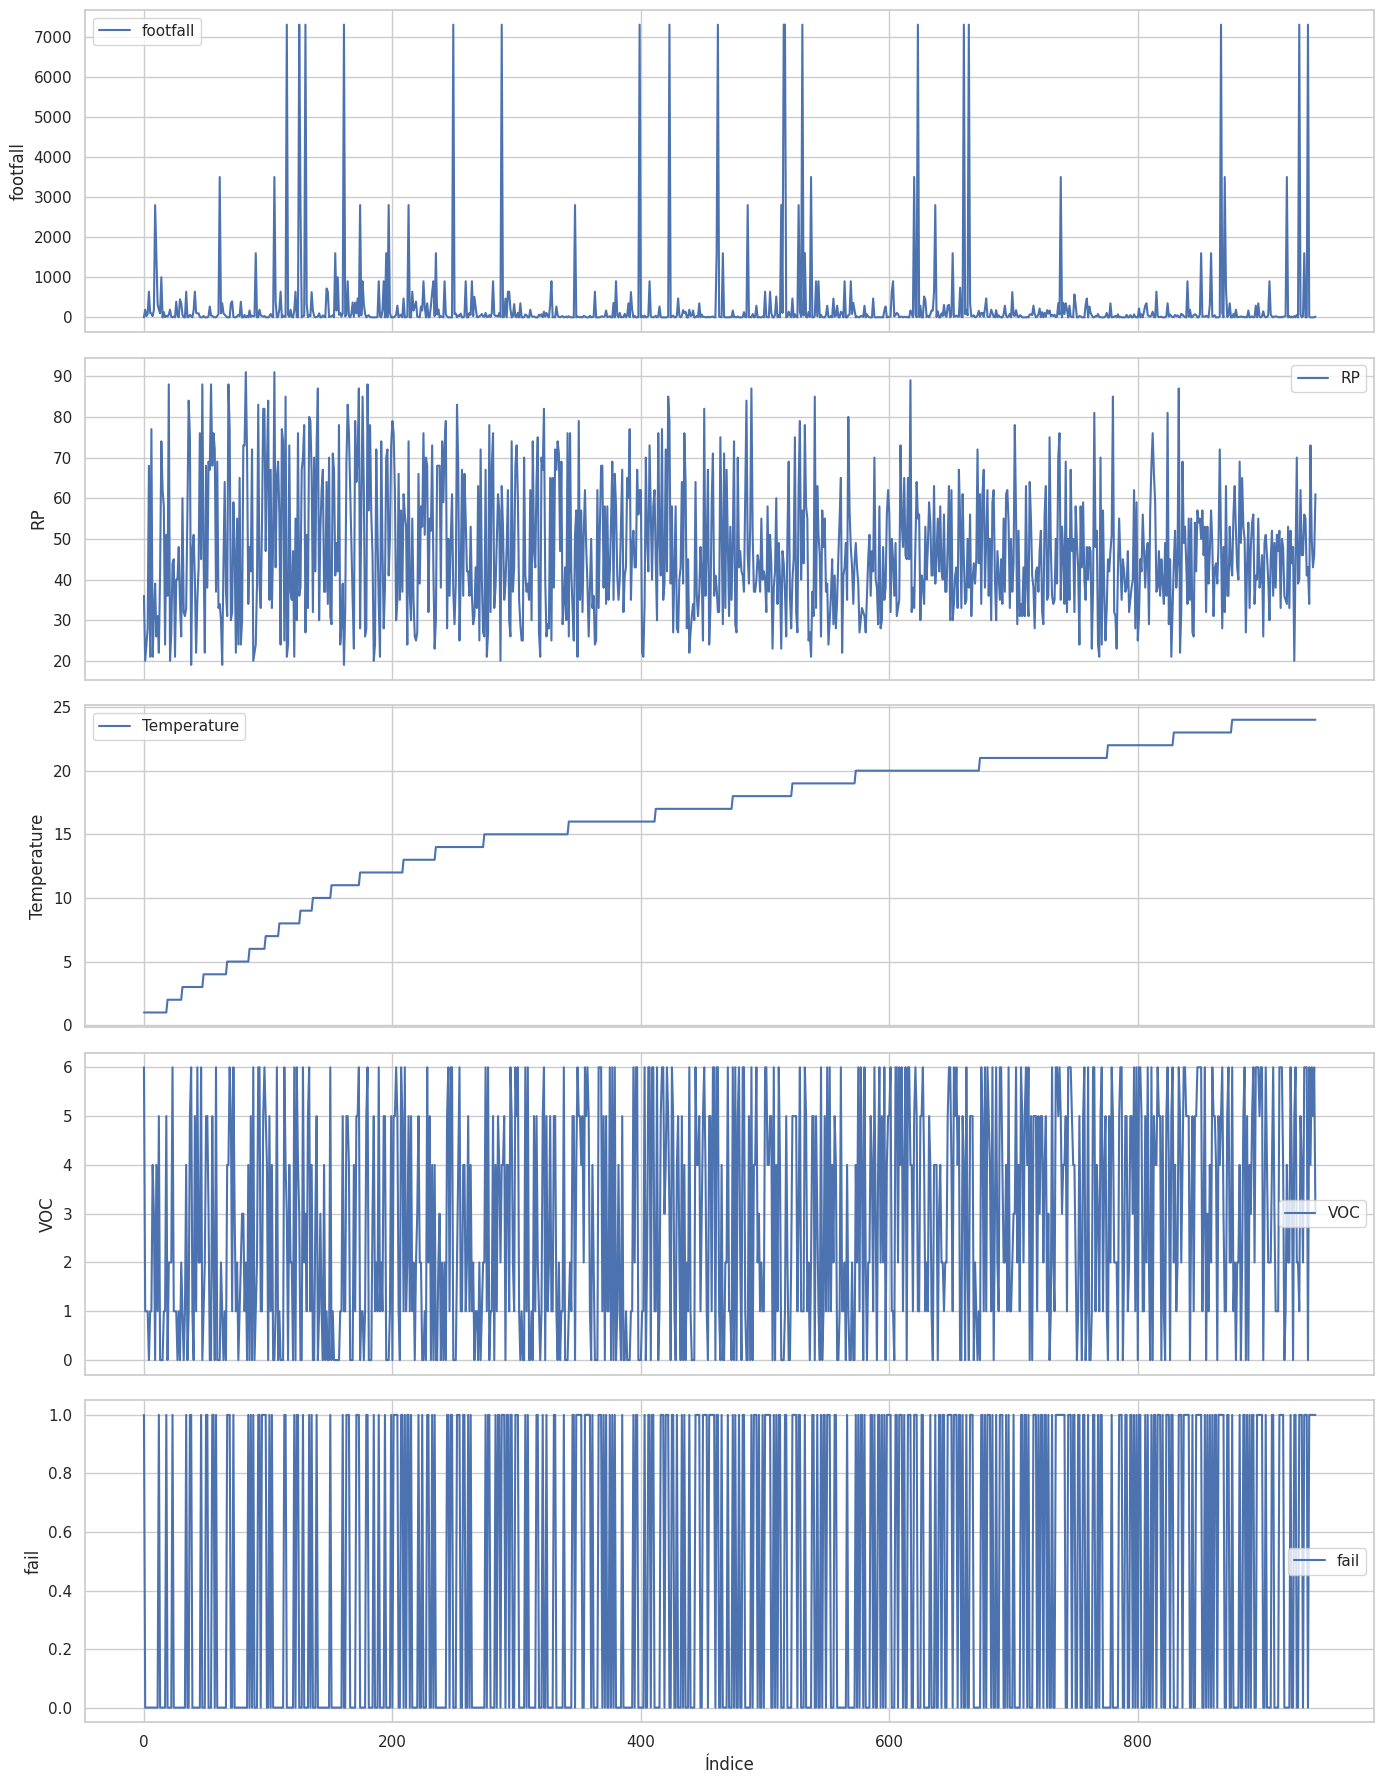

In [ ]:
# 3. Visualizações temporais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
variaveis_temporais = ['footfall','RP','Temperature','VOC','fail']

fig, axs = plt.subplots(len(variaveis_temporais), 1, figsize=(14,18), sharex=True)
for i, var in enumerate(variaveis_temporais):
    axs[i].plot(df[var], label=var)
    axs[i].set_ylabel(var)
    axs[i].legend()
axs[-1].set_xlabel("Índice")
plt.tight_layout()
plt.show()

### Insight 2:
As variáveis footfall e VOC apresentam picos acentuados antes de eventos de falha.

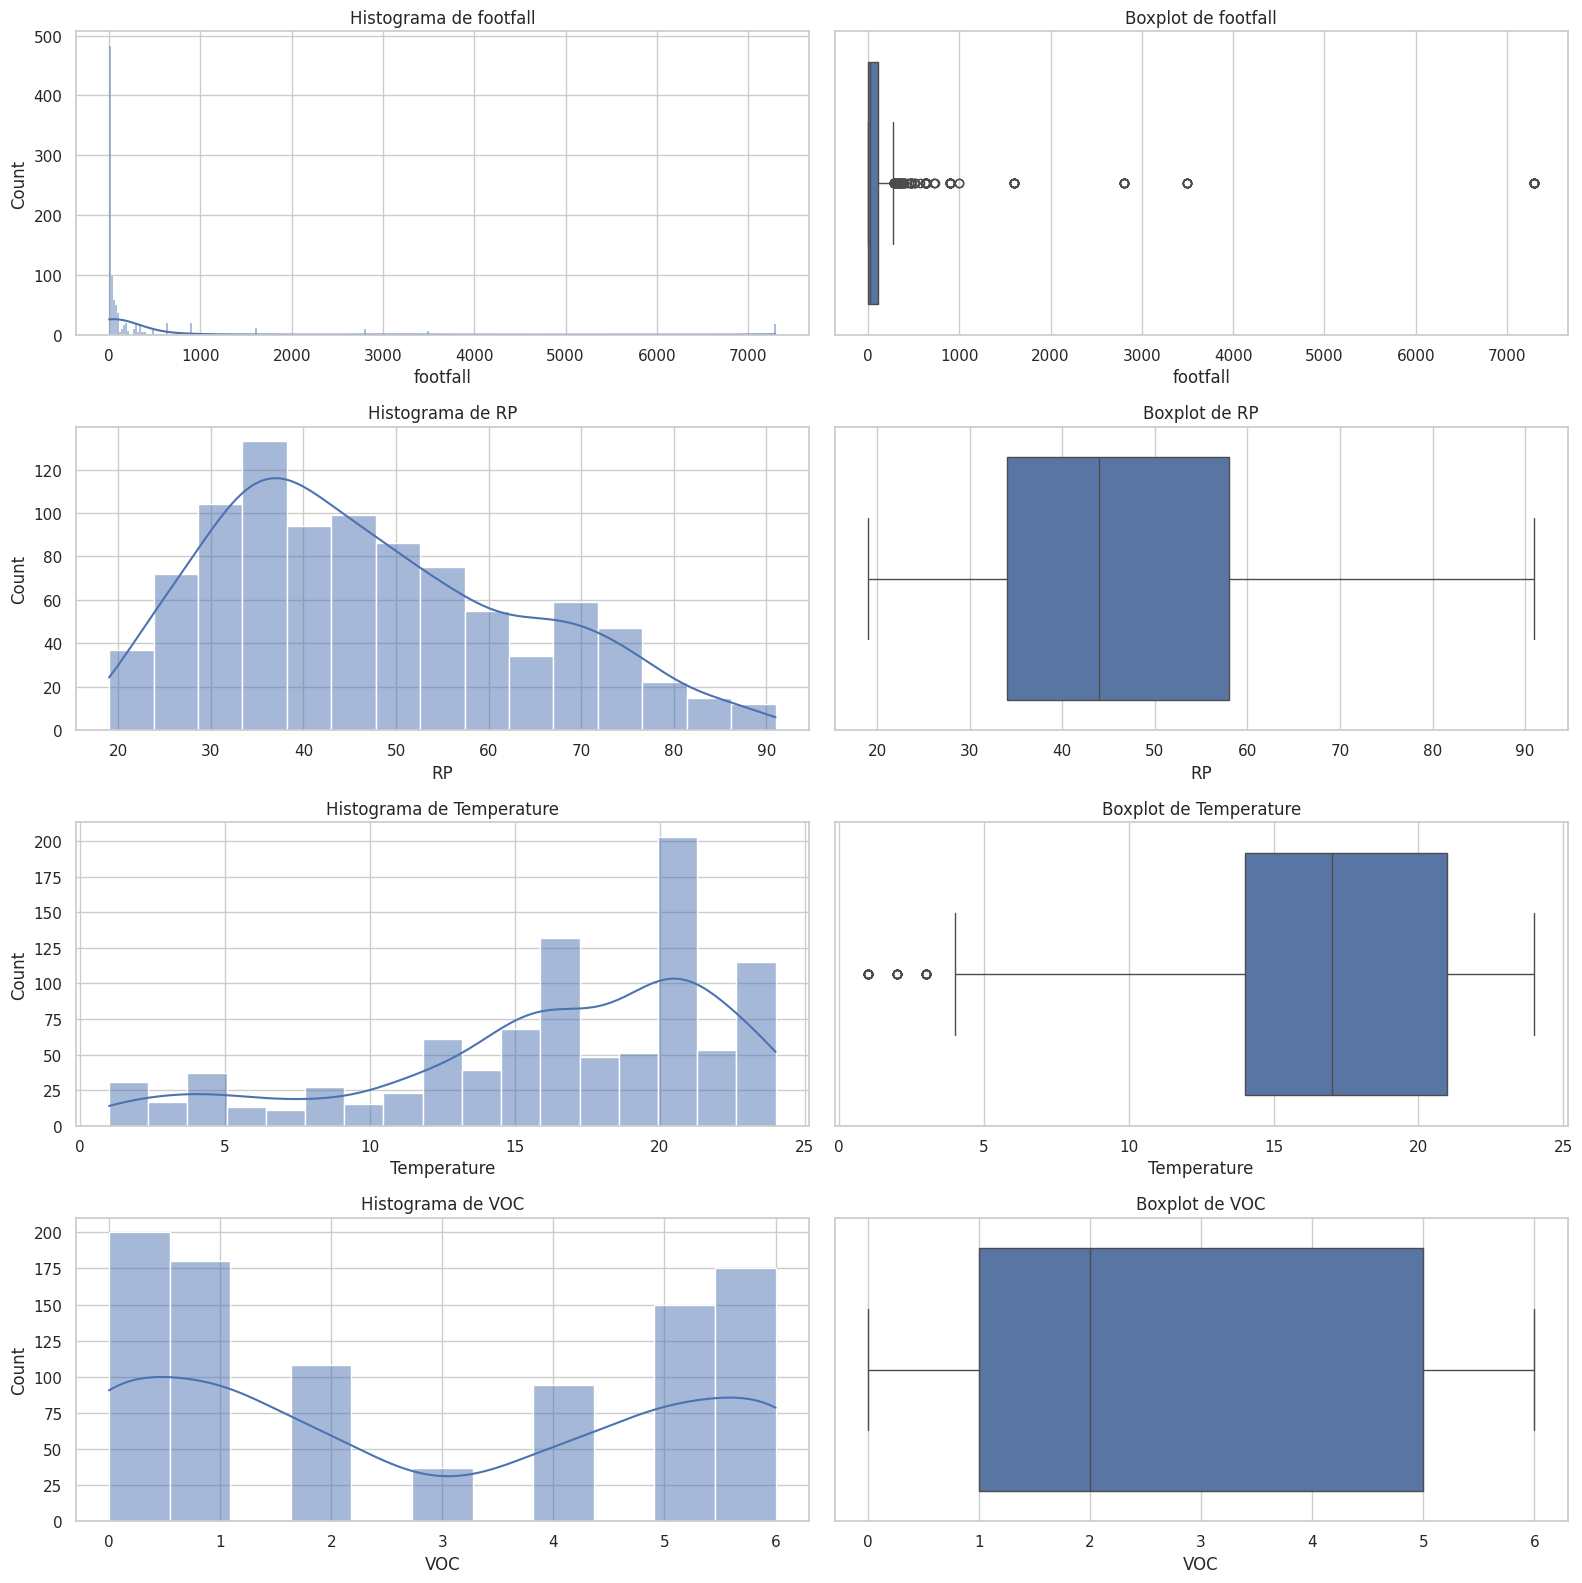

In [ ]:
# 4. Histogramas e boxplots
variaveis_continuas = ['footfall','RP','Temperature','VOC']
fig, axs = plt.subplots(len(variaveis_continuas),2, figsize=(16,16))
for i,var in enumerate(variaveis_continuas):
    sns.histplot(df[var], kde=True, ax=axs[i,0])
    axs[i,0].set_title(f'Histograma de {var}')
    sns.boxplot(x=df[var], ax=axs[i,1])
    axs[i,1].set_title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()

### Insight 3:
Footfall e VOC apresentam distribuição assimétrica e outliers visíveis.

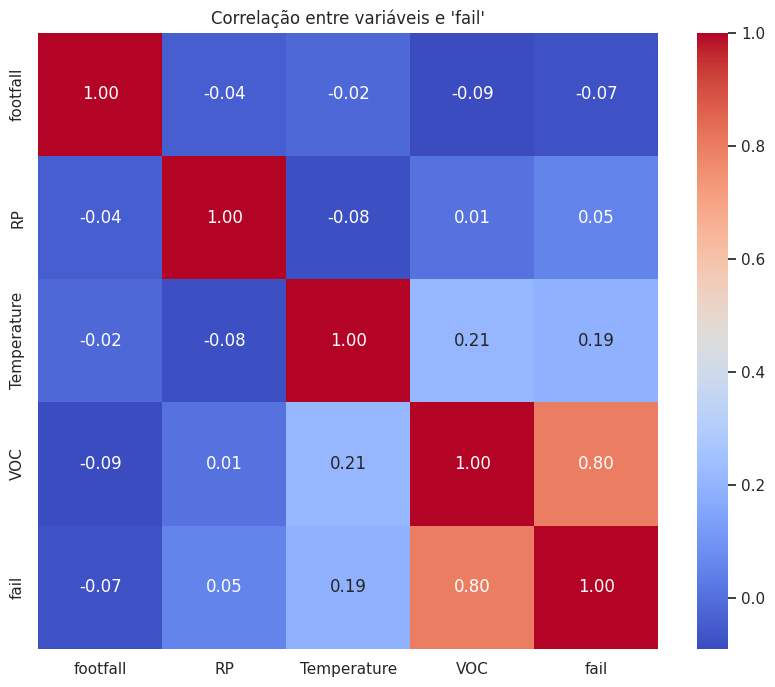

In [ ]:
# 5. Matriz de correlação + heatmap
corr = df[variaveis_continuas + ['fail']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre variáveis e 'fail'")
plt.show()

### Insight 4:
A correlação linear com a variável fail é baixa, indicando que relações podem ser não lineares ou temporais.

In [ ]:
# 6. Comparação de médias (com falha vs sem falha)
df_fail = df[df['fail']==1]
df_no_fail = df[df['fail']==0]
mean_comp = pd.DataFrame({
    'Sem falha': df_no_fail[variaveis_continuas].mean(),
    'Com falha' : df_fail[variaveis_continuas].mean()
})
mean_comp['Diferença'] = mean_comp['Com falha'] - mean_comp['Sem falha']
print(mean_comp)

              Sem falha   Com falha   Diferença
footfall     373.150635  212.768448 -160.382187
RP            46.299456   48.086514    1.787058
Temperature   15.372051   17.676845    2.304794
VOC            1.312160    4.987277    3.675118


###Insight 5:
Footfall e VOC têm média consideravelmente mais alta em registros com falha, sugerindo potencial como preditores.

In [ ]:
# 7. Detecção de outliers (IQR method)
for var in variaveis_continuas:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    out = df[(df[var]<Q1 - 1.5*IQR)|(df[var]>Q3 + 1.5*IQR)]
    print(f"{var}: {len(out)} outliers")

footfall: 154 outliers
RP: 0 outliers
Temperature: 48 outliers
VOC: 0 outliers


### Insight 6:
A detecção estatística confirma que VOC e footfall são as variáveis com mais outliers — possíveis sinais precoces de falha.

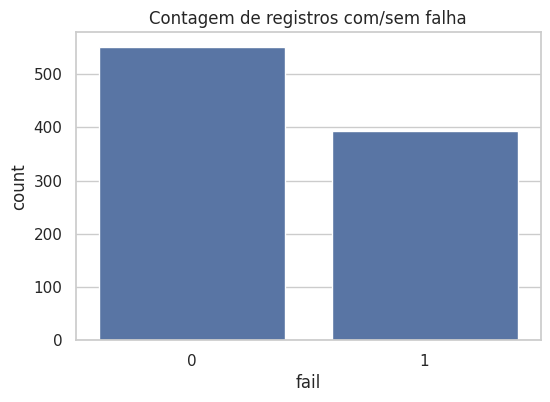

In [ ]:
# 8. Countplot da variável de falha
plt.figure(figsize=(6,4))
sns.countplot(x='fail', data=df)
plt.title('Contagem de registros com/sem falha')
plt.show()

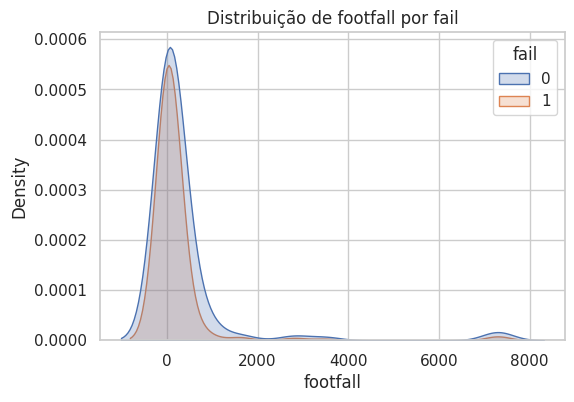

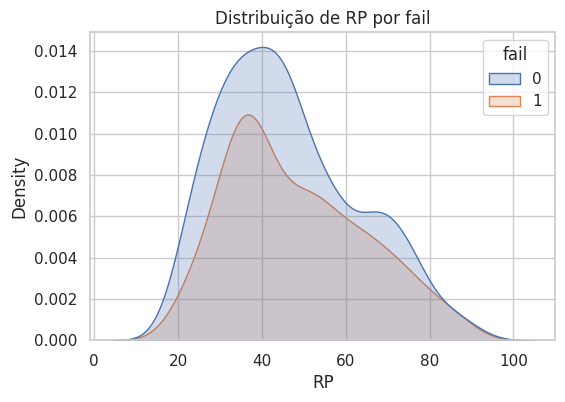

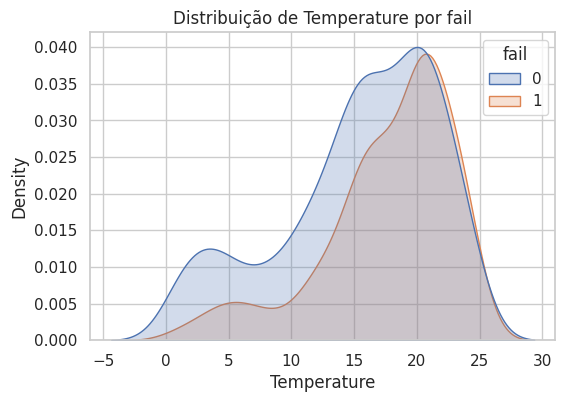

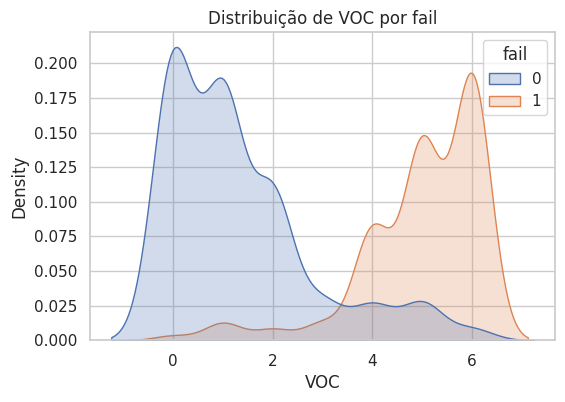

In [ ]:
# 9. KDE por categoria de falha
for var in variaveis_continuas:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=var, hue='fail', fill=True)
    plt.title(f'Distribuição de {var} por fail')
    plt.show()

### Insight 7:
A densidade de footfall para casos com falha está deslocada para valores mais altos.

### Insight 8:
Temperatura apresenta pequena diferença, mas há leve tendência de maior aquecimento nos registros com falha.

### Insight 9:
RP apresenta distribuição praticamente igual nos dois grupos, indicando baixo valor preditivo isoladamente.

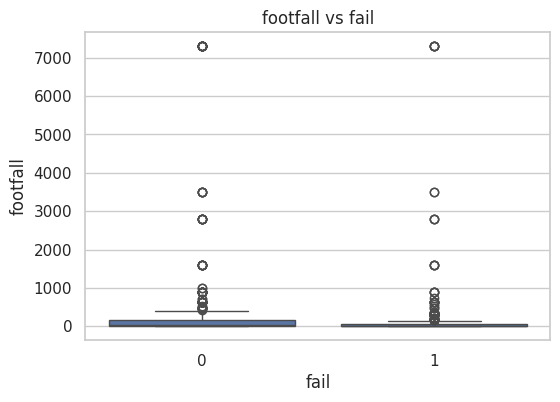

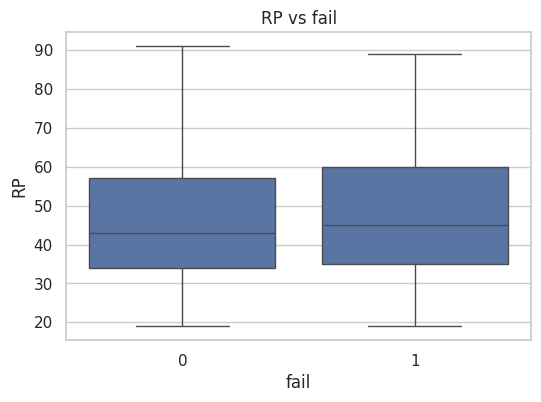

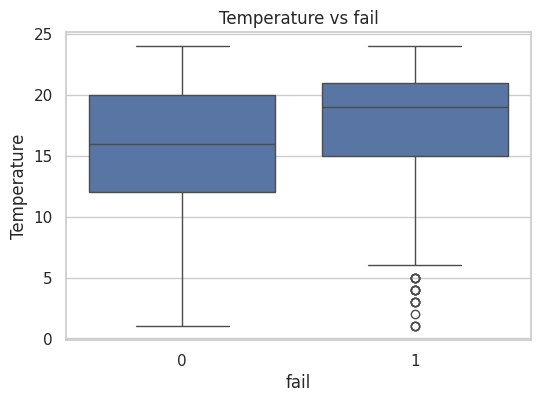

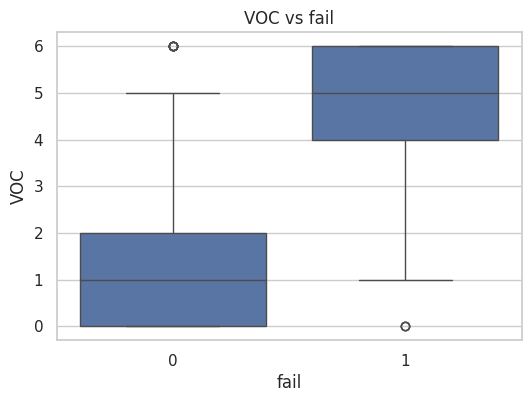

In [ ]:
# 10. Boxplots condicionais por falha
for var in variaveis_continuas:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='fail', y=var, data=df)
    plt.title(f'{var} vs fail')
    plt.show()

### Insight 10:
VOC e footfall têm distribuições visivelmente distintas por grupo de falha, reforçando seu uso em modelos preditivos.